## Welcome to this collaborative notebook focused on object detection and tracking using YOLOv8 for tomato detection in agricultural fields. The significance of automating tomato detection lies in enhancing crop monitoring and yield estimation. YOLOv8, a state-of-the-art object detection algorithm, offers real-time efficiency crucial for field applications. In this tutorial, we will explore the implementation of YOLOv8 for precise tomato detection, delve into tracking methodologies for monitoring their movement, and conclude with a novel approach to counting tomatoes. By the end, you'll gain insights into leveraging advanced computer vision techniques for optimizing tomato cultivation processes. Let's embark on this journey to revolutionize tomato farming through cutting-edge technology.

> ## I) Install YOLOv8:

In [ ]:
# Pip install (recommended)
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.2/661.2 kB 9.7 MB/s eta 0:00:00


> ##  II) -  importing data and spliting it into training and validation set.
> ### This step is optional, if your data is already split

In [ ]:
## importing required libraries
import os
import shutil
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

!pip install tqdm --upgrade
from tqdm.notebook import tqdm

In [ ]:
## connecting to the google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
train_path_img = "/content/drive/MyDrive/YOLOv8_Data/Graps_Data/train/images"
train_path_label = "/content/drive/MyDrive/YOLOv8_Data/Graps_Data/train/labels"
val_path_img = "/content/drive/MyDrive/YOLOv8_Data/Graps_Data/valid/images"
val_path_label = "/content/drive/MyDrive/YOLOv8_Data/Graps_Data/valid/labels/"
test_path = "/content/drive/MyDrive/YOLOv8_Data/Graps_Data/test/images"

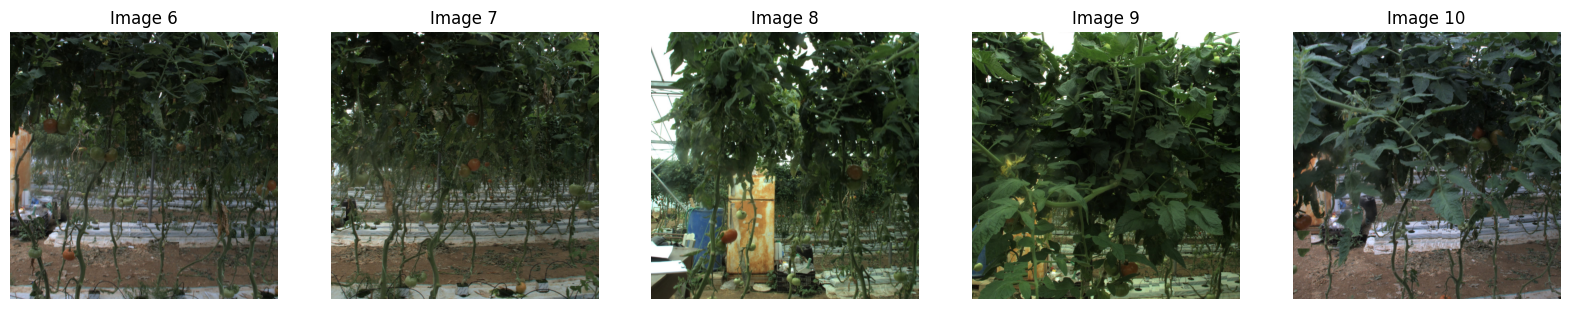

In [ ]:
image_directory = '/content/drive/MyDrive/YOLOv8_Data/tomatDB/images/val'
image_files = os.listdir(image_directory)
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i in range(5,10,1):
    img_path = os.path.join(image_directory, image_files[i])
    img = mpimg.imread(img_path)
    axes[i-5].imshow(img)
    axes[i-5].axis('off')
    axes[i-5].set_title(f'Image {i+1}')
plt.show()

In [ ]:
'''
Split the dataset into train and test and creates the train.txt and test.tx with
the respective path of the images in each folder
'''

def train_test_split(path,neg_path=None, split = 0.2):
    print("------ PROCESS STARTED -------")


    files = list(set([name[:-4] for name in os.listdir(path)])) ## removing duplicate names i.e. counting only number of images


    print (f"--- This folder has a total number of {len(files)} images---")
    random.seed(42)
    random.shuffle(files)

    test_size = int(len(files) * split)
    train_size = len(files) - test_size

    ## creating required directories

    os.makedirs(train_path_img, exist_ok = True)
    os.makedirs(train_path_label, exist_ok = True)
    os.makedirs(val_path_img, exist_ok = True)
    os.makedirs(val_path_label, exist_ok = True)


    ### ----------- copying images to train folder
    for filex in tqdm(files[:train_size]):
      if filex == 'classes':
          continue
      shutil.copy2(path + filex + '.jpg',f"{train_path_img}/" + filex + '.jpg' )
      shutil.copy2(path + filex + '.txt', f"{train_path_label}/" + filex + '.txt')



    print(f"------ Training data created with 80% split {len(files[:train_size])} images -------")

    if neg_path:
        neg_images = list(set([name[:-4] for name in os.listdir(neg_path)])) ## removing duplicate names i.e. counting only number of images
        for filex in tqdm(neg_images):
            shutil.copy2(neg_path+filex+ ".jpg", f"{train_path_img}/" + filex + '.jpg')

        print(f"------ Total  {len(neg_images)} negative images added to the training data -------")

        print(f"------ TOTAL Training data created with {len(files[:train_size]) + len(neg_images)} images -------")



    ### copytin images to validation folder
    for filex in tqdm(files[train_size:]):
      if filex == 'classes':
          continue
      # print("running")
      shutil.copy2(path + filex + '.jpg', f"{val_path_img}/" + filex + '.jpg' )
      shutil.copy2(path + filex + '.txt', f"{val_path_label}/" + filex + '.txt')

    print(f"------ Testing data created with a total of {len(files[train_size:])} images ----------")

    print("------ TASK COMPLETED -------")

## spliting the data into train-test and creating train.txt and test.txt files
# train_test_split('/content/drive/MyDrive/custom_notebooks/yolo_data/')

### for label_tag
train_test_split('/content/drive/MyDrive/yolov8/data/') ### without negative images
# train_test_split('./data/','./negative_images/') ### if you want to feed negative images

------ PROCESS STARTED -------
--- This folder has a total number of 123 images---


  0%|          | 0/99 [00:00<?, ?it/s]

------ Training data created with 80% split 99 images -------


  0%|          | 0/24 [00:00<?, ?it/s]

------ Testing data created with a total of 24 images ----------
------ TASK COMPLETED -------


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.228 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.2/78.2 GB disk)


> ## III) - training phase.

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/YOLOv8_Data/tomatDB/sample_dataset.yaml epochs=10 imgsz=640 batch=8 project=/content/drive/MyDrive/YOLOv8_Data/tomatDB/training_results name=Tomato_Detection

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/YOLOv8_Data/tomatDB/sample_dataset.yaml, epochs=10, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/YOLOv8_Data/tomatDB/training_results, name=Tomato_Detection3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=Fal

>> ### The YOLOv8 model was trained on tomato detection using the specified dataset. The optimizer was stripped from the trained model weights, resulting in a file size of 22.5MB for both the last and best checkpoints.
>> ### During validation, the model achieved the following metrics on different tomato classes: "all" (0.748 Precision, 0.858 Recall, 0.853 mAP50), "unripe" (0.792 Precision, 0.921 Recall, 0.940 mAP50), "semi-ripe" (0.610 Precision, 0.773 Recall, 0.720 mAP50), and "fully-ripe" (0.841 Precision, 0.879 Recall, 0.898 mAP50). The overall mAP50 was 0.556. The model's inference speed was 8.6ms, and the results were saved to the specified directory.

> ## IV) - Inferencing:
>> ### 1) -  Applying the model on images.

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/YOLOv8_Data/tomatDB/training_results/Tomato_Detection3/weights/best.pt conf=0.55 source=/content/drive/MyDrive/YOLOv8_Data/tomatDB/test_images

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/7 /content/drive/MyDrive/YOLOv8_Data/tomatDB/test_images/Copie de stereo20190405_132743_p0_snap_488.jpg: 640x640 5 unripes, 2 semi-ripes, 1 fully-ripe, 16.4ms
image 2/7 /content/drive/MyDrive/YOLOv8_Data/tomatDB/test_images/Copie de stereo20190405_132743_p0_snap_493.jpg: 640x640 8 unripes, 2 semi-ripes, 1 fully-ripe, 16.4ms
image 3/7 /content/drive/MyDrive/YOLOv8_Data/tomatDB/test_images/Copie de stereo20190405_132743_p0_snap_496.jpg: 640x640 11 unripes, 1 semi-ripe, 1 fully-ripe, 16.3ms
image 4/7 /content/drive/MyDrive/YOLOv8_Data/tomatDB/test_images/Copie de stereo20190405_132743_p0_snap_524.jpg: 640x640 10 unripes, 1 semi-ripe, 16.4ms
image 5/7 /content/drive/MyDrive/YOLOv8_Data/tomatDB/test_images/Copie de stereo20190405_133623_p0_snap_041.jpg: 640x640 1 semi-ripe, 

In [ ]:
!cp -r /content/runs/detect/predict2 /content/drive/MyDrive/YOLOv8_Data/tomatDB/output

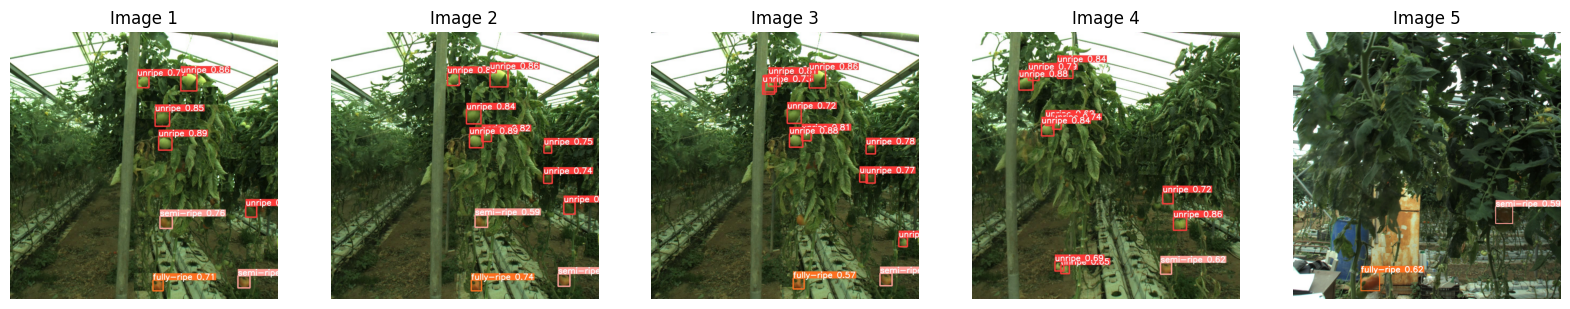

In [ ]:
image_directory = '/content/drive/MyDrive/YOLOv8_Data/tomatDB/output/predict2'
image_files = os.listdir(image_directory)
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i in range(5):
    img_path = os.path.join(image_directory, image_files[i])
    img = mpimg.imread(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f'Image {i+1}')
plt.show()

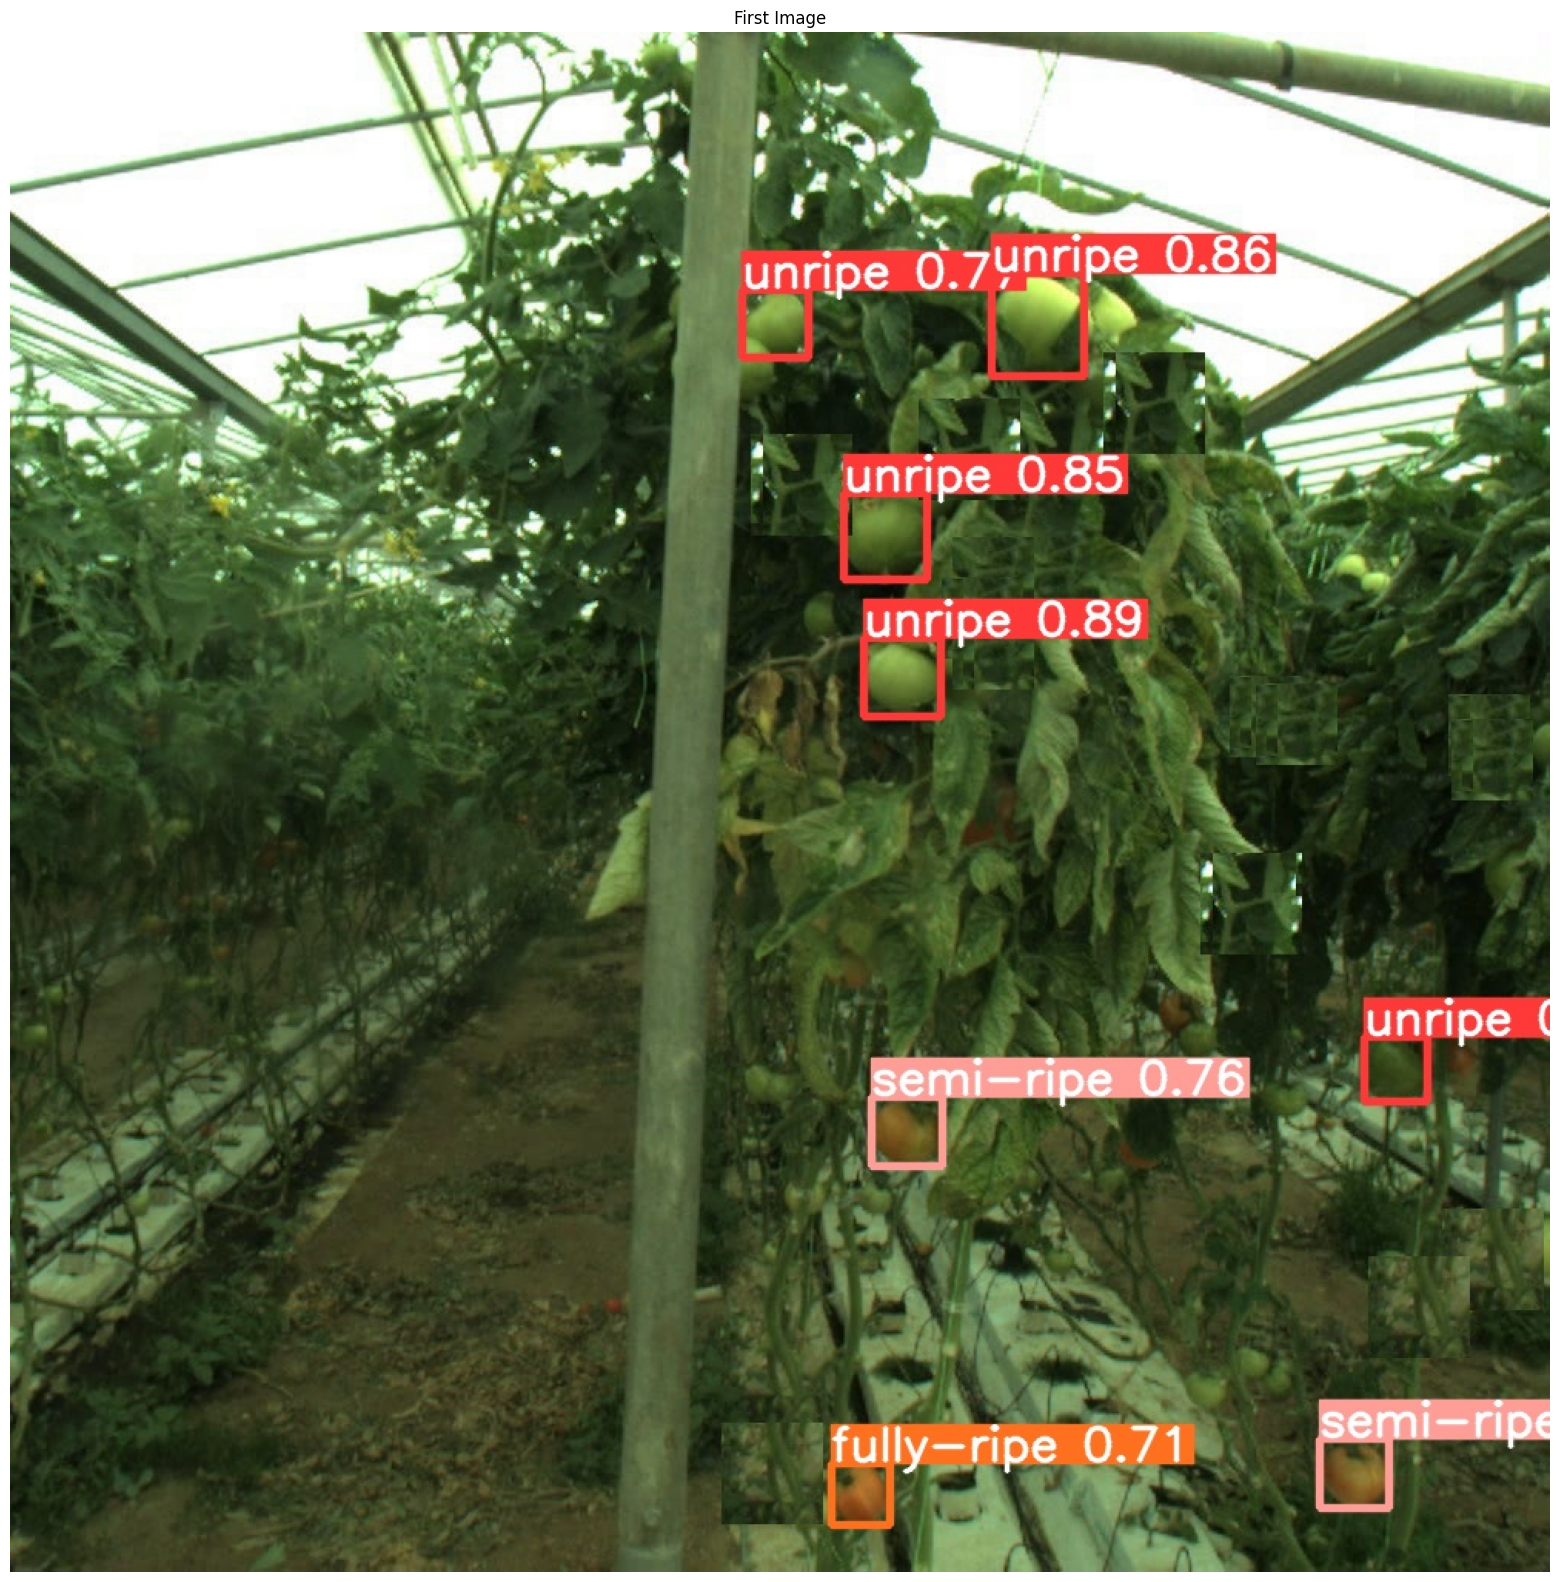

In [ ]:
image_directory = '/content/drive/MyDrive/YOLOv8_Data/tomatDB/output/predict2'
image_files = os.listdir(image_directory)
fig, axes = plt.subplots(1, 1, figsize=(20, 20))
img_path = os.path.join(image_directory, image_files[0])
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')
plt.title('First Image')
plt.show()

>> ### 2) - Applaying the model on video


In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/YOLOv8_Data/tomatDB/training_results/Tomato_Detection3/weights/best.pt conf=0.77 source=/content/drive/MyDrive/YOLOv8_Data/tomatDB/vid_test

Streaming output truncated to the last 5000 lines.
video 1/1 (10122/15118) /content/drive/MyDrive/YOLOv8_Data/tomatDB/vid_test/y2mate.com - Amazing Greenhouse Tomatoes Farming  Greenhouse Modern Agriculture Technology_720p.mp4: 384x640 (no detections), 10.8ms
video 1/1 (10123/15118) /content/drive/MyDrive/YOLOv8_Data/tomatDB/vid_test/y2mate.com - Amazing Greenhouse Tomatoes Farming  Greenhouse Modern Agriculture Technology_720p.mp4: 384x640 (no detections), 10.7ms
video 1/1 (10124/15118) /content/drive/MyDrive/YOLOv8_Data/tomatDB/vid_test/y2mate.com - Amazing Greenhouse Tomatoes Farming  Greenhouse Modern Agriculture Technology_720p.mp4: 384x640 (no detections), 10.7ms
video 1/1 (10125/15118) /content/drive/MyDrive/YOLOv8_Data/tomatDB/vid_test/y2mate.com - Amazing Greenhouse Tomatoes Farming  Greenhouse Modern Agriculture Technology_720p.mp4: 384x640 (no detections), 10.8ms
video 1/1 (10126/15118) /content/drive/MyDrive/YOLOv8_Data/tomatDB/vid_test/y2mate.com - Amazing Greenhouse Tomat

In [ ]:
!cp -r /content/runs/detect/predict3 /content/drive/MyDrive/YOLOv8_Data/tomatDB/output

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/YOLOv8_Data/tomatDB/training_results/Tomato_Detection3/weights/best.pt conf=0.5 source=/content/drive/MyDrive/YOLOv8_Data/tomatDB/vid_test

In [ ]:
# !cp -r /content/runs/detect/predict3 /content/drive/MyDrive/yolov8/output

>> ### 3) - Guide : Export the model -- In progress

Export a YOLOv8 model to any supported format with the `format` argument, i.e. `format=onnx`.

Format                  | `format=...**bold text**`         | Model
---                     | ---                       | ---
PyTorch                 | -                         | yolov8n.pt
TorchScript             | `torchscript`             | yolov8n.torchscript
ONNX                    | `onnx`                    | yolov8n.onnx
OpenVINO                | `openvino`                | yolov8n_openvino_model/
TensorRT                | `engine`                  | yolov8n.engine
CoreML                  | `coreml`                  | yolov8n.mlmodel
TensorFlow SavedModel   | `saved_model`             | yolov8n_saved_model/
TensorFlow GraphDef     | `pb`                      | yolov8n.pb
TensorFlow Lite         | `tflite`                  | yolov8n.tflite
TensorFlow Edge TPU     | `edgetpu`                 | yolov8n_edgetpu.tflite
TensorFlow.js           | `tfjs`                    | yolov8n_web_model/
PaddlePaddle            | `paddle`                  | yolov8n_paddle_model/

>> ### 4) Exporting the model

In [ ]:
!yolo mode=export model=/content/drive/MyDrive/YOLOv8_Data/tomatDB/training_results/Tomato_Detection3/weights/best.pt format=onnx

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/YOLOv8_Data/tomatDB/training_results/Tomato_Detection3/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (21.5 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 75.4 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 8.2s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 10.5s, saved as '/content/drive/MyDrive/YOLOv8_Data/tomatDB/training_results/Tomato_Detection3/weights/best.onnx' (42.7 MB)

Export complete (13.9s)
Results saved to /content/drive/MyDrive/YOLOv8_Data/tomatDB/training_results/T

> ## V - track and count objects (Tomatoes in the field)

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


>> ## 1) -  Install ByteTrack

>> ### - [ByteTrack](https://github.com/ifzhang/ByteTrack) is a multi-object tracking computer vision model. Using ByteTrack, you can allocate IDs for unique objects in a video for use in tracking objects. For example, you can track players on a football field and monitor them throughout a scene.

>> ### - [ByteTrack](https://github.com/ifzhang/ByteTrack) is great tracker but a bit poorly packaged. We need to jump through some fire hoops to make it work in tandem with [YOLOv8](https://github.com/ultralytics/ultralytics).

In [ ]:
%cd {HOME}
!git clone https://github.com/ifzhang/ByteTrack.git
%cd {HOME}/ByteTrack

# workaround related to https://github.com/roboflow/notebooks/issues/80
!sed -i 's/onnx==1.8.1/onnx==1.9.0/g' requirements.txt

!pip3 install -q -r requirements.txt
!python3 setup.py -q develop
!pip install -q cython_bbox
!pip install -q onemetric
# workaround related to https://github.com/roboflow/notebooks/issues/112 and https://github.com/roboflow/notebooks/issues/106
!pip install -q loguru lap thop

from IPython import display
display.clear_output()


import sys
sys.path.append(f"{HOME}/ByteTrack")


import yolox
print("yolox.__version__:", yolox.__version__)

yolox.__version__: 0.1.0


In [ ]:
from yolox.tracker.byte_tracker import BYTETracker, STrack
from onemetric.cv.utils.iou import box_iou_batch
from dataclasses import dataclass


@dataclass(frozen=True)
class BYTETrackerArgs:
    track_thresh: float = 0.25
    track_buffer: int = 30
    match_thresh: float = 0.8
    aspect_ratio_thresh: float = 3.0
    min_box_area: float = 1.0
    mot20: bool = False

> ## 2) - Install Roboflow Supervision

> ###  *   Roboflow is a platform that provides tools and services for managing and preprocessing image datasets, making it easier to train computer vision models.



In [ ]:
!pip install supervision==0.1.0


from IPython import display
display.clear_output()


import supervision
print("supervision.__version__:", supervision.__version__)

supervision.__version__: 0.1.0


In [ ]:
from supervision.draw.color import ColorPalette
from supervision.geometry.dataclasses import Point
from supervision.video.dataclasses import VideoInfo
from supervision.video.source import get_video_frames_generator
from supervision.video.sink import VideoSink
from supervision.notebook.utils import show_frame_in_notebook
from supervision.tools.detections import Detections, BoxAnnotator
from supervision.tools.line_counter import LineCounter, LineCounterAnnotator

> ## 3) - Tracking utils

> ### Unfortunately, we have to manually match the bounding boxes coming from our model with those created by the tracker.

In [ ]:
from typing import List
import numpy as np


# converts Detections into format that can be consumed by match_detections_with_tracks function
def detections2boxes(detections: Detections) -> np.ndarray:
    return np.hstack((
        detections.xyxy,
        detections.confidence[:, np.newaxis]
    ))


# converts List[STrack] into format that can be consumed by match_detections_with_tracks function
def tracks2boxes(tracks: List[STrack]) -> np.ndarray:
    return np.array([
        track.tlbr
        for track
        in tracks
    ], dtype=float)


# matches our bounding boxes with predictions
def match_detections_with_tracks(
    detections: Detections,
    tracks: List[STrack]
) -> Detections:
    if not np.any(detections.xyxy) or len(tracks) == 0:
        return np.empty((0,))

    tracks_boxes = tracks2boxes(tracks=tracks)
    iou = box_iou_batch(tracks_boxes, detections.xyxy)
    track2detection = np.argmax(iou, axis=1)

    tracker_ids = [None] * len(detections)

    for tracker_index, detection_index in enumerate(track2detection):
        if iou[tracker_index, detection_index] != 0:
            tracker_ids[detection_index] = tracks[tracker_index].track_id

    return tracker_ids

> ## 4) - Load pre-trained YOLOv8 model

In [ ]:
# settings
MODEL = "/content/drive/MyDrive/YOLOv8_Data/tomatDB/training_results/Tomato_Detection3/weights/best.pt"
from ultralytics import YOLO
model = YOLO(MODEL)
model.fuse()

Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs


In [ ]:
from ultralytics import YOLO
MODEL = "yolov8x.pt"
model = YOLO(MODEL)
model.fuse()

YOLOv8x summary (fused): 268 layers, 68200608 parameters, 0 gradients, 257.8 GFLOPs


> ## 5) - Predict and annotate single frame

In [ ]:
SOURCE_VIDEO_PATH = "/content/drive/MyDrive/YOLOv8_Data/tomatDB/vid_test/y2mate.com - Amazing Greenhouse Tomatoes Farming  Greenhouse Modern Agriculture Technology_720p.mp4"

In [ ]:
# dict maping class_id to class_name
CLASS_NAMES_DICT = { 0 : 'unripe'  , 1: 'semi-ripe' , 2 : 'fully-ripe' }# model.model.names
# class_ids of interest - car, motorcycle, bus and truck
CLASS_ID = [0,1,2]


WARNING ⚠️ NMS time limit 0.550s exceeded
0: 384x640 23 unripes, 2 semi-ripes, 25 fully-ripes, 142.3ms
Speed: 12.5ms preprocess, 142.3ms inference, 751.6ms postprocess per image at shape (1, 3, 384, 640)


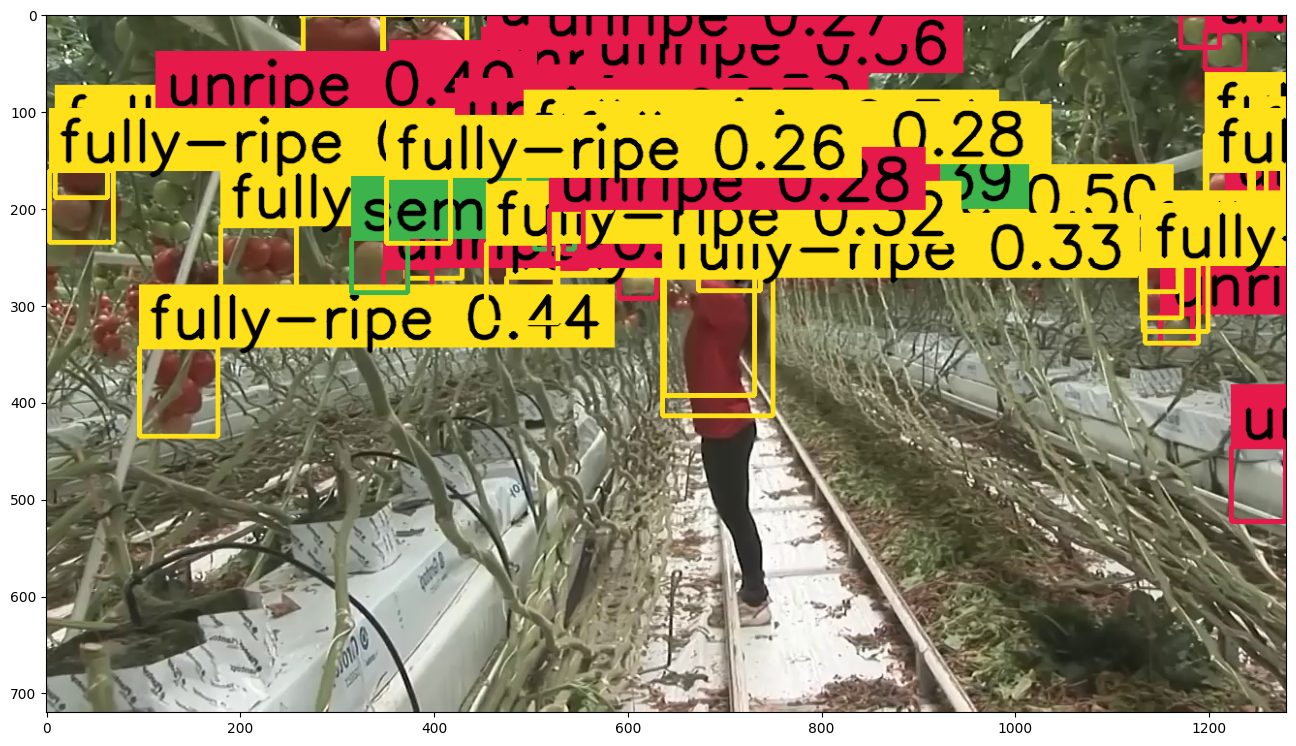

In [ ]:
# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
# create instance of BoxAnnotator
box_annotator = BoxAnnotator(color=ColorPalette(), thickness=4, text_thickness=4, text_scale=2)
# acquire first video frame
iterator = iter(generator)
frame = next(iterator)
# model prediction on single frame and conversion to supervision Detections
results = model(frame)
detections = Detections(
    xyxy=results[0].boxes.xyxy.cpu().numpy(),
    confidence=results[0].boxes.conf.cpu().numpy(),
    class_id=results[0].boxes.cls.cpu().numpy().astype(int)
)
# format custom labels
labels = [
    f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
    for _, confidence, class_id, tracker_id
    in detections
]
# annotate and display frame
frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)

%matplotlib inline
show_frame_in_notebook(frame, (16, 16))

> ## 6) - Predict and annotate whole video

In [ ]:
# settings
LINE_START = Point(50, 1500)
LINE_END = Point(3840-50, 1500)

TARGET_VIDEO_PATH ="/content/drive/MyDrive/YOLOv8_Data/tomatDB/vid_test/y2mate.com - Amazing Greenhouse Tomatoes Farming  Greenhouse Modern Agriculture Technology_720p.mp4"
VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

VideoInfo(width=1280, height=720, fps=25, total_frames=15118)

In [ ]:
from tqdm.notebook import tqdm


# create BYTETracker instance
byte_tracker = BYTETracker(BYTETrackerArgs())
# create VideoInfo instance
video_info = VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
# create LineCounter instance
line_counter = LineCounter(start=LINE_START, end=LINE_END)
# create instance of BoxAnnotator and LineCounterAnnotator
box_annotator = BoxAnnotator(color=ColorPalette(), thickness=4, text_thickness=4, text_scale=2)
line_annotator = LineCounterAnnotator(thickness=4, text_thickness=4, text_scale=2)

# open target video file
with VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    # loop over video frames
    for frame in tqdm(generator, total=video_info.total_frames):
        # model prediction on single frame and conversion to supervision Detections
        results = model(frame)
        detections = Detections(
            xyxy=results[0].boxes.xyxy.cpu().numpy(),
            confidence=results[0].boxes.conf.cpu().numpy(),
            class_id=results[0].boxes.cls.cpu().numpy().astype(int)
        )
        # filtering out detections with unwanted classes
        mask = np.array([class_id in CLASS_ID for class_id in detections.class_id], dtype=bool)
        detections.filter(mask=mask, inplace=True)
        # tracking detections
        tracks = byte_tracker.update(
            output_results=detections2boxes(detections=detections),
            img_info=frame.shape,
            img_size=frame.shape
        )
        tracker_id = match_detections_with_tracks(detections=detections, tracks=tracks)
        detections.tracker_id = np.array(tracker_id)
        # filtering out detections without trackers
        mask = np.array([tracker_id is not None for tracker_id in detections.tracker_id], dtype=bool)
        detections.filter(mask=mask, inplace=True)
        # format custom labels
        labels = [
            f"#{tracker_id} {CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
            for _, confidence, class_id, tracker_id
            in detections
        ]
        # updating line counter
        line_counter.update(detections=detections)
        # annotate and display frame
        frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)
        line_annotator.annotate(frame=frame, line_counter=line_counter)
        sink.write_frame(frame)

  0%|          | 0/15118 [00:00<?, ?it/s]

Exception: ignored